<a href="https://colab.research.google.com/github/nisha1365/GEN-AI-POC/blob/main/Final_BTM_120Topic_Vaccination.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
!pip install tweet-preprocessor

In [2]:
!pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 21.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.8/132.8 kB 13.8 MB/s eta 0:00:00
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 3.7 MB/s eta 0:00:00
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039278 sha256=c9dba98288d79cbbdf519651e21dc2cd1a0e45c21a7017c2defbcaf586ac5fb6
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
  Created wheel for umap-

In [39]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
# import tweet preprocessor
import preprocessor as p

import nltk
import gensim
import re
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from bertopic import BERTopic
#from sklearn.decomposition import PCA
from sentence_transformers import SentenceTransformer
from umap import UMAP
from hdbscan import HDBSCAN
#from sklearn.cluster import KMeans
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel
from bertopic.vectorizers import ClassTfidfTransformer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [40]:
import pandas as pd
data_tweet= pd.read_csv("/content/Final_Clean_Prediatric_tweets20feb.csv")
data_tweet

,tweet_id,text,author_id,created_at,clean_text
0,1758008368193577187,Latest data on #COVID19 vaccination coverage i...,1407429338652348420,2024-02-15T06:00:31+00:00,latest data on covid19 vaccination coverage in...
1,1758007021536788892,@MtnPatti @BabaYaga2397 Never heard that. Have...,1484684486776434690,2024-02-15T05:55:10+00:00,never heard that. have a customer whose mother...
2,1758006092083376237,@norsedog Pertussis immunity also wanes and ad...,1435645799845621764,2024-02-15T05:51:29+00:00,pertussis immunity also wanes and adults are r...
3,1758005634404929904,@La_Mooid @ClementLeeMD Yep. And that is if yo...,1518686818669150208,2024-02-15T05:49:40+00:00,yep. and that is if you even need a doctor for...
4,1758005322214760467,"@CastiglioneFrnk @BabaYaga2397 Tetanus vac, ha...",1487221327693946880,2024-02-15T05:48:25+00:00,"tetanus vac, has one of higher/ highest rates ..."
...,...,...,...,...,...
38448,1754111271949988349,@HopeRising19: NEW STUDY - NEURODEVELOPMENT IM...,1618619350792945665,2024-02-04T11:54:51+00:00,new study - neurodevelopment implications for ...
38449,1754077386461561320,@JenniferMarguli: Prenatal Exposure to COVID‐1...,1565187379572482048,2024-02-04T09:40:12+00:00,prenatal exposure to covid‐19 mrna vaccine bnt...
38450,1754055919267422528,@DuBarryPie: I happen to think we should use p...,1497093494120144896,2024-02-04T08:14:54+00:00,i happen to think we should use public space i...
38451,1754039101882286328,@Jlasoon: @WarshipCam @weiqi_xiulang Make sure...,1348410889536466947,2024-02-04T07:08:05+00:00,make sure you get your tetanus shot before you...


In [79]:
import pandas as pd
# Assuming 'created_at' is in string format, convert it to datetime
data_tweet['created_at'] = pd.to_datetime(data_tweet['created_at'], errors = 'coerce')

# Create a new column for the date, time, and day
data_tweet['date'] = data_tweet['created_at'].dt.date
data_tweet['time'] = data_tweet['created_at'].dt.time
data_tweet['day_of_week'] = data_tweet['created_at'].dt.day_name()
# Display the updated DataFrame
data_tweet

,tweet_id,text,author_id,created_at,clean_text,new_lemma_text,date,time,day_of_week
0,1758008368193577187,Latest data on #COVID19 vaccination coverage i...,1407429338652348420,2024-02-15 06:00:31+00:00,latest data covid19 vaccination coverage eu/ee...,latest data covid19 vaccination coverage eu/ee...,2024-02-15,06:00:31,Thursday
1,1758007021536788892,@MtnPatti @BabaYaga2397 Never heard that. Have...,1484684486776434690,2024-02-15 05:55:10+00:00,never heard . customer whose mother died tetan...,never heard . customer whose mother died tetan...,2024-02-15,05:55:10,Thursday
2,1758006092083376237,@norsedog Pertussis immunity also wanes and ad...,1435645799845621764,2024-02-15 05:51:29+00:00,pertussis immunity also wanes adults recommend...,pertussis immunity also wane adult recommended...,2024-02-15,05:51:29,Thursday
3,1758005634404929904,@La_Mooid @ClementLeeMD Yep. And that is if yo...,1518686818669150208,2024-02-15 05:49:40+00:00,"yep . even need doctor , cases ’ . fear monger...","yep . even need doctor , case ’ . fear mongeri...",2024-02-15,05:49:40,Thursday
4,1758005322214760467,"@CastiglioneFrnk @BabaYaga2397 Tetanus vac, ha...",1487221327693946880,2024-02-15 05:48:25+00:00,"tetanus vac , one higher/ highest rates seriou...","tetanus vac , one higher/ highest rate serious...",2024-02-15,05:48:25,Thursday
...,...,...,...,...,...,...,...,...,...
38448,1754111271949988349,@HopeRising19: NEW STUDY - NEURODEVELOPMENT IM...,1618619350792945665,2024-02-04 11:54:51+00:00,new study - neurodevelopment implications offs...,new study - neurodevelopment implication offsp...,2024-02-04,11:54:51,Sunday
38449,1754077386461561320,@JenniferMarguli: Prenatal Exposure to COVID‐1...,1565187379572482048,2024-02-04 09:40:12+00:00,prenatal exposure covid‐19 mrna vaccine bnt162...,prenatal exposure covid‐19 mrna vaccine bnt162...,2024-02-04,09:40:12,Sunday
38450,1754055919267422528,@DuBarryPie: I happen to think we should use p...,1497093494120144896,2024-02-04 08:14:54+00:00,happen think use public space creative ways . ...,happen think use public space creative way . s...,2024-02-04,08:14:54,Sunday
38451,1754039101882286328,@Jlasoon: @WarshipCam @weiqi_xiulang Make sure...,1348410889536466947,2024-02-04 07:08:05+00:00,"make sure get tetanus shot board , even look ....","make sure get tetanus shot board , even look ....",2024-02-04,07:08:05,Sunday


In [80]:
timestamp=data_tweet.created_at.tolist()

In [42]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [43]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def remove_stopwords(text):
    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.lower() not in stop_words]

    # Join tokens back into a string
    filtered_text = ' '.join(tokens)

    return filtered_text

# Remove stopwords from the "clean_text" column
data_tweet['clean_text'] = data_tweet['clean_text'].apply(remove_stopwords)


In [45]:
data_tweet

,tweet_id,text,author_id,created_at,clean_text
0,1758008368193577187,Latest data on #COVID19 vaccination coverage i...,1407429338652348420,2024-02-15T06:00:31+00:00,latest data covid19 vaccination coverage eu/ee...
1,1758007021536788892,@MtnPatti @BabaYaga2397 Never heard that. Have...,1484684486776434690,2024-02-15T05:55:10+00:00,never heard . customer whose mother died tetan...
2,1758006092083376237,@norsedog Pertussis immunity also wanes and ad...,1435645799845621764,2024-02-15T05:51:29+00:00,pertussis immunity also wanes adults recommend...
3,1758005634404929904,@La_Mooid @ClementLeeMD Yep. And that is if yo...,1518686818669150208,2024-02-15T05:49:40+00:00,"yep . even need doctor , cases ’ . fear monger..."
4,1758005322214760467,"@CastiglioneFrnk @BabaYaga2397 Tetanus vac, ha...",1487221327693946880,2024-02-15T05:48:25+00:00,"tetanus vac , one higher/ highest rates seriou..."
...,...,...,...,...,...
38448,1754111271949988349,@HopeRising19: NEW STUDY - NEURODEVELOPMENT IM...,1618619350792945665,2024-02-04T11:54:51+00:00,new study - neurodevelopment implications offs...
38449,1754077386461561320,@JenniferMarguli: Prenatal Exposure to COVID‐1...,1565187379572482048,2024-02-04T09:40:12+00:00,prenatal exposure covid‐19 mrna vaccine bnt162...
38450,1754055919267422528,@DuBarryPie: I happen to think we should use p...,1497093494120144896,2024-02-04T08:14:54+00:00,happen think use public space creative ways . ...
38451,1754039101882286328,@Jlasoon: @WarshipCam @weiqi_xiulang Make sure...,1348410889536466947,2024-02-04T07:08:05+00:00,"make sure get tetanus shot board , even look ...."


In [46]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

def lemmatize_text(text):
  """Lemmatizes a text.

  Args:
    text: The text to lemmatize.

  Returns:
    The lemmatized text.
  """

  words = nltk.word_tokenize(text)
  lemmas = [nltk.WordNetLemmatizer().lemmatize(word) for word in words]
  return " ".join(lemmas)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [47]:
data_tweet['new_lemma_text'] = data_tweet["clean_text"].apply(lemmatize_text)

In [48]:
data_tweet

,tweet_id,text,author_id,created_at,clean_text,new_lemma_text
0,1758008368193577187,Latest data on #COVID19 vaccination coverage i...,1407429338652348420,2024-02-15T06:00:31+00:00,latest data covid19 vaccination coverage eu/ee...,latest data covid19 vaccination coverage eu/ee...
1,1758007021536788892,@MtnPatti @BabaYaga2397 Never heard that. Have...,1484684486776434690,2024-02-15T05:55:10+00:00,never heard . customer whose mother died tetan...,never heard . customer whose mother died tetan...
2,1758006092083376237,@norsedog Pertussis immunity also wanes and ad...,1435645799845621764,2024-02-15T05:51:29+00:00,pertussis immunity also wanes adults recommend...,pertussis immunity also wane adult recommended...
3,1758005634404929904,@La_Mooid @ClementLeeMD Yep. And that is if yo...,1518686818669150208,2024-02-15T05:49:40+00:00,"yep . even need doctor , cases ’ . fear monger...","yep . even need doctor , case ’ . fear mongeri..."
4,1758005322214760467,"@CastiglioneFrnk @BabaYaga2397 Tetanus vac, ha...",1487221327693946880,2024-02-15T05:48:25+00:00,"tetanus vac , one higher/ highest rates seriou...","tetanus vac , one higher/ highest rate serious..."
...,...,...,...,...,...,...
38448,1754111271949988349,@HopeRising19: NEW STUDY - NEURODEVELOPMENT IM...,1618619350792945665,2024-02-04T11:54:51+00:00,new study - neurodevelopment implications offs...,new study - neurodevelopment implication offsp...
38449,1754077386461561320,@JenniferMarguli: Prenatal Exposure to COVID‐1...,1565187379572482048,2024-02-04T09:40:12+00:00,prenatal exposure covid‐19 mrna vaccine bnt162...,prenatal exposure covid‐19 mrna vaccine bnt162...
38450,1754055919267422528,@DuBarryPie: I happen to think we should use p...,1497093494120144896,2024-02-04T08:14:54+00:00,happen think use public space creative ways . ...,happen think use public space creative way . s...
38451,1754039101882286328,@Jlasoon: @WarshipCam @weiqi_xiulang Make sure...,1348410889536466947,2024-02-04T07:08:05+00:00,"make sure get tetanus shot board , even look ....","make sure get tetanus shot board , even look ...."


In [49]:
!pip install emoji

In [51]:
#Extract embeddings
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

In [52]:
# Reduce dimensionality
umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine',random_state=100)

In [53]:
#Cluster reduced embeddings
hdbscan_model = HDBSCAN(min_cluster_size=15,min_samples = 5, metric='euclidean', cluster_selection_method='eom', prediction_data=True)

In [54]:
vectorizer_model = CountVectorizer(stop_words="english")

In [55]:
ctfidf_model = ClassTfidfTransformer()


In [56]:
from bertopic import BERTopic
from bertopic.representation import MaximalMarginalRelevance

representation_model = MaximalMarginalRelevance(diversity=0.3)

topic_model = BERTopic(
  embedding_model=embedding_model,    # Step 1 - Extract embeddings
  umap_model=umap_model,              # Step 2 - Reduce dimensionality
  hdbscan_model=hdbscan_model,        # Step 3 - Cluster reduced embeddings
  vectorizer_model=vectorizer_model,  # Step 4 - Tokenize topics
  ctfidf_model=ctfidf_model,          # Step 5 - Extract topic words
  representation_model=representation_model,
  nr_topics=120,
  low_memory=True,
  n_gram_range=(1, 3),
  calculate_probabilities=True,
  verbose=True,
)

In [57]:
import time

In [58]:
tweet_list = data_tweet.new_lemma_text.tolist()

In [59]:
topics, probs = topic_model.fit_transform(tweet_list)

2024-02-20 10:24:58,070 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/1202 [00:00<?, ?it/s]

2024-02-20 10:36:54,629 - BERTopic - Embedding - Completed ✓
2024-02-20 10:36:54,636 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-02-20 10:38:01,468 - BERTopic - Dimensionality - Completed ✓
2024-02-20 10:38:01,477 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-02-20 10:48:27,904 - BERTopic - Cluster - Completed ✓
2024-02-20 10:48:27,907 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-02-20 10:49:44,249 - BERTopic - Representation - Completed ✓
2024-02-20 10:49:44,252 - BERTopic - Topic reduction - Reducing number of topics
2024-02-20 10:50:08,316 - BERTopic - Topic reduction - Reduced number of topics from 396 to 120


In [60]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,14340,-1_vaccination_vaccine_vaccinate_measles,"[vaccination, vaccine, vaccinate, measles, hea...",[unvaccinated child getting sick & amp ; vacci...
1,0,5088,0_autism_vaccination_kid_mortality,"[autism, vaccination, kid, mortality, schedule...",[safest vaccine vaccine “ lockdown ” american ...
2,1,2055,1_measles_mmr_case_catching,"[measles, mmr, case, catching, outbreak, unvac...",[3 million unvaccinated child risk catching me...
3,2,2028,2_covid_pregnant_risk_vaccine,"[covid, pregnant, risk, vaccine, vaccination, ...",[neonatal outcome covid-19 vaccination pregnan...
4,3,1452,3_tetanus_shot_hope_stitch,"[tetanus, shot, hope, stitch, wound, arm, hurt...","[get tetanus shot, would get tetanus shot, tet..."
...,...,...,...,...,...
115,114,15,114_nasty_flusnotfunny_reception_spray,"[nasty, flusnotfunny, reception, spray, sympto...",[flu cause lot nasty symptom one want see chil...
116,115,15,115_infertile_paternity_settling_widespread,"[infertile, paternity, settling, widespread, v...",[careful `` woman new york started lying vacci...
117,116,15,116_corynebacterium_diphtheriae_tonsil_bacterial,"[corynebacterium, diphtheriae, tonsil, bacteri...",[diphtheria serious infection caused strain ba...
118,117,15,117_hookworm_ringworm_worm_infections,"[hookworm, ringworm, worm, infections, fungal,...",['m joining war hookworm tetanus side hookworm...


In [61]:
docs = tweet_list
# Preprocess Documents
documents = pd.DataFrame({"Document": docs,
                          "ID": range(len(docs)),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]

topic_words = [[words for words, _ in topic_model.get_topic(topic) if words!='']
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words,
                                 texts=tokens,
                                 corpus=corpus,
                                 dictionary=dictionary,
                                 coherence='c_v')
coherence = coherence_model.get_coherence()
print(coherence)

0.6931759156830088


In [62]:
# Get topic info excluding topic number -1
topic_info = topic_model.get_topic_info()

In [63]:
topic_info.to_csv('topic_info_Pediatric_120topic.csv', index = False)

## **FINAL TWEETS BY TOPIC**

In [64]:
!pip install xlsxwriter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 4.2 MB/s eta 0:00:00


In [65]:
import pandas as pd
import xlsxwriter
from google.colab import files

# Create a Pandas Excel writer using XlsxWriter as the engine
excel_writer = pd.ExcelWriter('tweets_by_topics.xlsx', engine='xlsxwriter')

# Create a dictionary to store dataframes for each topic
dataframes_by_topic = {}

# Iterate over each topic label
for topic_label in range(100):  # Assuming you have 100 topics
    # Find indices of tweets assigned to the current topic
    topic_indices = [index for index, label in enumerate(topics) if label == topic_label]

    # Extract tweet IDs and texts for the current topic
    tweets_topic = data_tweet.loc[topic_indices, ['tweet_id', 'text']]

    # Store the tweets for the current topic in the dictionary
    dataframes_by_topic[topic_label] = tweets_topic

# Write each dataframe to a separate sheet
for topic_label, tweets_topic in dataframes_by_topic.items():
    # Create a sheet name for the current topic
    sheet_name = f"Topic_{topic_label}"

    # Write the dataframe to the Excel file
    tweets_topic.to_excel(excel_writer, sheet_name=sheet_name, index=False)

# Save the Excel file
excel_writer.save()

# Download the Excel file
files.download('tweets_by_topics.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [66]:
def get_bert_topics(topic_model, num_topics):
    word_dict = {}
    for i in range(num_topics):
        words=topic_model.get_topic(i)
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words]
    return pd.DataFrame(word_dict)

get_bert_topics(topic_model, len(set(topics))-1)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09,Topic # 10,...,Topic # 110,Topic # 111,Topic # 112,Topic # 113,Topic # 114,Topic # 115,Topic # 116,Topic # 117,Topic # 118,Topic # 119
0,autism,measles,covid,tetanus,rsv,mumps,clinic,flu,pertussis,sids,...,factmission,formaldehyde,bollock,ugliest,implicate,nasty,infertile,corynebacterium,hookworm,cybertruck
1,vaccination,mmr,pregnant,shot,pfizer,smallpox,centre,influenza,dtap,sudden,...,data,milligram,truth,crusade,wolf,flusnotfunny,paternity,diphtheriae,ringworm,buy
2,kid,case,risk,hope,preterm,polio,walk,winter,whoopingcough,infant,...,occupation,pear,nelson,bioweapon,delta,reception,settling,tonsil,worm,cybertrucks
3,mortality,catching,vaccine,stitch,pregnant,measles,appointment,nivw,outbreak,syndrome,...,sued,blood,hurt,zombie,drew,spray,widespread,bacterial,infections,lame
4,schedule,outbreak,vaccination,wound,neonatal,pertussis,flu,week,encephalopathy,scotland,...,password,natural,acknowledgement,wef,300,symptom,value,toxin,fungal,razor
5,vaccine,unvaccinated,maternal,arm,vaccine,tuberculosis,covid19,nasal,diphtheria,detective,...,persiste,infant,phillipson,vitamin,pregnant,nasal,pussy,pseudomembrane,tetanus,penis
6,exemption,vaccination,covid19,hurt,fda,rabies,st,spray,vaccine,58,...,westminst,metabolism,insulted,vegan,disease,form,fraud,bacterium,tungiasis,tetanus
7,highest,risk,benefit,injection,incorrect,vaccine,visit,appointment,infant,vaers,...,timetotalkpublichealth,hydrolyzed,testing,impugn,covid,flu,pureblood,pharynx,hepatis,ta
8,infant,appointment,vaccinated,antibiotic,abrysvo,influenza,cps,fightflu,coughing,mortality,...,word,ecperiments,heavy,skittle,vacci,11,percept,bacteriophage,scratching,brake
9,cdc,rubella,flu,im,newborn,meningitis,monday,sick,vaccinated,vaccine,...,theft,monosodium,lmao,sacred,vaccine,child,pandemic,tonsilitis,mrsa,firing


In [67]:
topics_list = get_bert_topics(topic_model, len(set(topics))-1)
topics_list

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09,Topic # 10,...,Topic # 110,Topic # 111,Topic # 112,Topic # 113,Topic # 114,Topic # 115,Topic # 116,Topic # 117,Topic # 118,Topic # 119
0,autism,measles,covid,tetanus,rsv,mumps,clinic,flu,pertussis,sids,...,factmission,formaldehyde,bollock,ugliest,implicate,nasty,infertile,corynebacterium,hookworm,cybertruck
1,vaccination,mmr,pregnant,shot,pfizer,smallpox,centre,influenza,dtap,sudden,...,data,milligram,truth,crusade,wolf,flusnotfunny,paternity,diphtheriae,ringworm,buy
2,kid,case,risk,hope,preterm,polio,walk,winter,whoopingcough,infant,...,occupation,pear,nelson,bioweapon,delta,reception,settling,tonsil,worm,cybertrucks
3,mortality,catching,vaccine,stitch,pregnant,measles,appointment,nivw,outbreak,syndrome,...,sued,blood,hurt,zombie,drew,spray,widespread,bacterial,infections,lame
4,schedule,outbreak,vaccination,wound,neonatal,pertussis,flu,week,encephalopathy,scotland,...,password,natural,acknowledgement,wef,300,symptom,value,toxin,fungal,razor
5,vaccine,unvaccinated,maternal,arm,vaccine,tuberculosis,covid19,nasal,diphtheria,detective,...,persiste,infant,phillipson,vitamin,pregnant,nasal,pussy,pseudomembrane,tetanus,penis
6,exemption,vaccination,covid19,hurt,fda,rabies,st,spray,vaccine,58,...,westminst,metabolism,insulted,vegan,disease,form,fraud,bacterium,tungiasis,tetanus
7,highest,risk,benefit,injection,incorrect,vaccine,visit,appointment,infant,vaers,...,timetotalkpublichealth,hydrolyzed,testing,impugn,covid,flu,pureblood,pharynx,hepatis,ta
8,infant,appointment,vaccinated,antibiotic,abrysvo,influenza,cps,fightflu,coughing,mortality,...,word,ecperiments,heavy,skittle,vacci,11,percept,bacteriophage,scratching,brake
9,cdc,rubella,flu,im,newborn,meningitis,monday,sick,vaccinated,vaccine,...,theft,monosodium,lmao,sacred,vaccine,child,pandemic,tonsilitis,mrsa,firing


In [69]:
topics_list.to_csv("Final_Topics_list.csv", index = False)

In [70]:
topic_model.visualize_topics()

In [71]:
topic_model.visualize_barchart()

In [72]:
!pip install wordcloud

In [73]:
from wordcloud import WordCloud

In [74]:
def create_wordcloud(topic_model, topic):
    text = {word: value for word, value in topic_model.get_topic(topic)}
    wc = WordCloud(background_color="white", max_words=1000)
    wc.generate_from_frequencies(text)
    plt.figure(figsize=(5, 4), dpi=150)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("On")
    plt.title("Representation of Topic"+" "+ str(topic))
    plt.show()

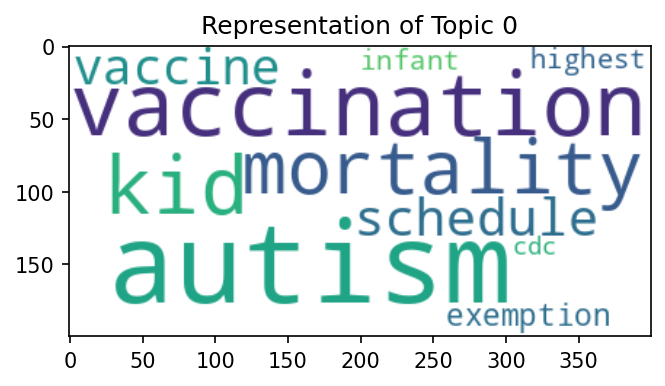

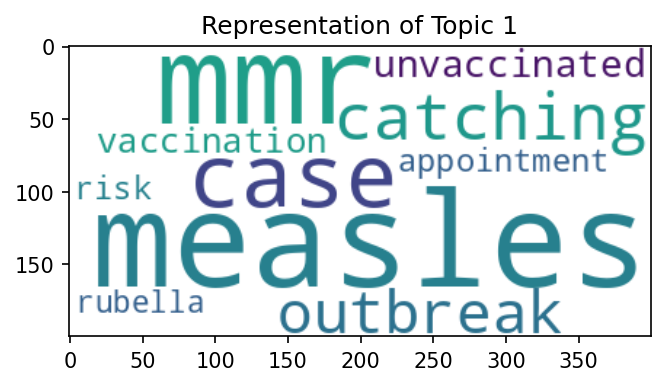

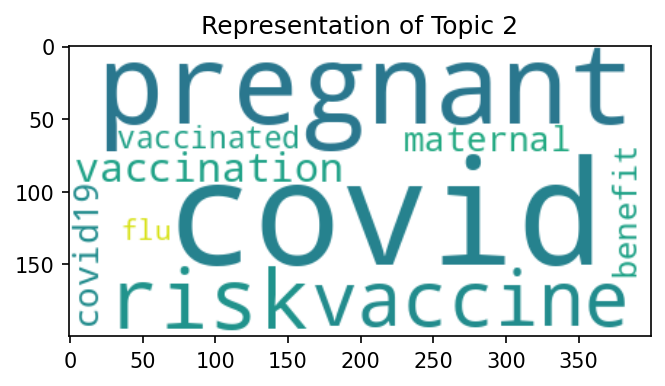

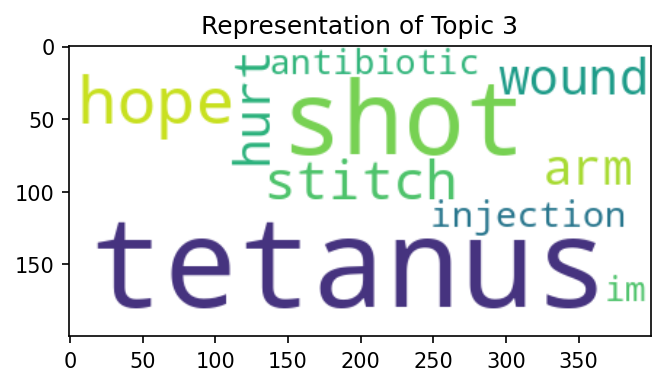

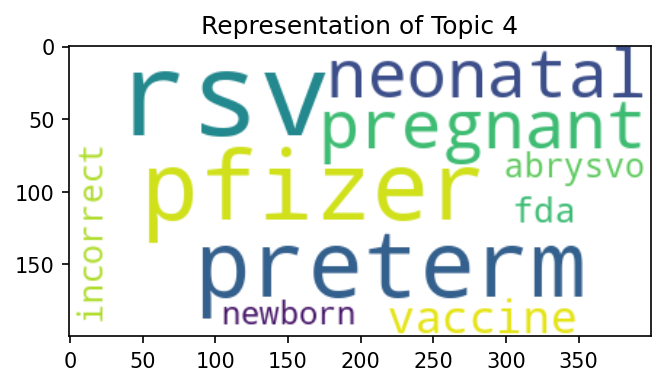

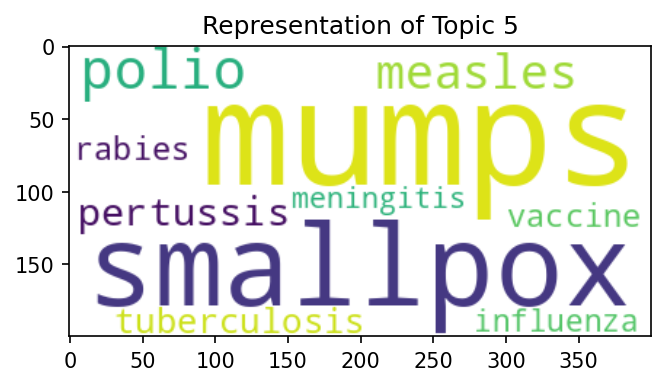

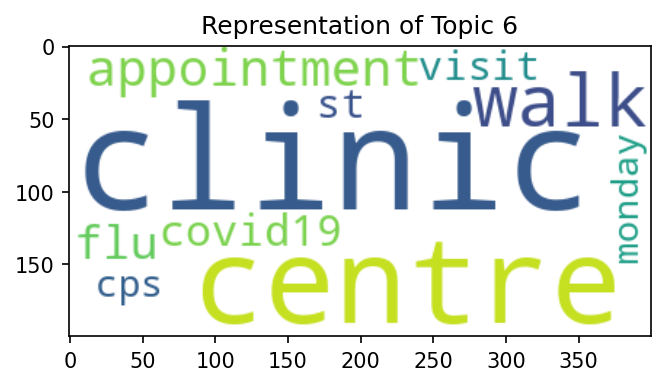

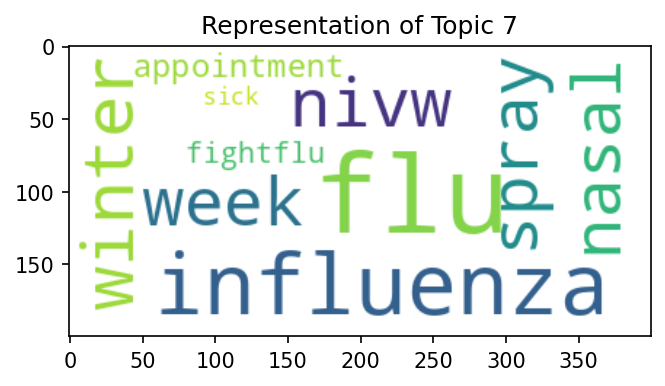

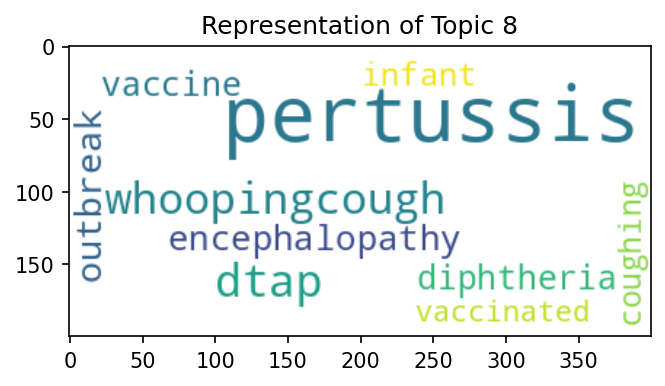

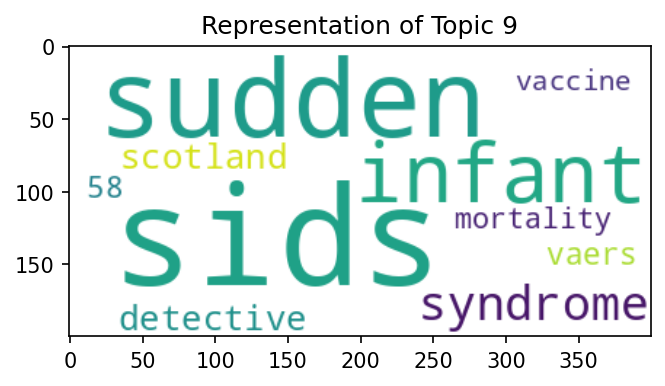

In [75]:
#visualize the top 10 topics
for i in range(0,10):
    create_wordcloud(topic_model, topic=i)

In [76]:
topic_model.visualize_heatmap(top_n_topics=10)

In [78]:
# Extract hierarchical topics and their representations
hierarchical_topics = topic_model.hierarchical_topics(docs)

# Visualize these representations
topic_model.visualize_hierarchy(hierarchical_topics=hierarchical_topics)

100%|██████████| 118/118 [00:23<00:00,  4.94it/s]


In [81]:
topics_over_time = topic_model.topics_over_time(tweet_list, timestamp, nr_bins=20)
topics_over_time

20it [04:10, 12.54s/it]


,Topic,Words,Frequency,Timestamp
0,-1,"vaccination, vaccine, vaccinate, people, health",485,2023-11-04 04:01:38.244000+00:00
1,0,"mortality, highest, infant, autism, vaccination",156,2023-11-04 04:01:38.244000+00:00
2,1,"measles, mmr, shirt, originates, 2019",18,2023-11-04 04:01:38.244000+00:00
3,2,"covid, pregnancy, risk, maternal, covid19",90,2023-11-04 04:01:38.244000+00:00
4,3,"troll, paying, tetanus, shot, hope",1,2023-11-04 04:01:38.244000+00:00
...,...,...,...,...
1352,112,"bioweapon, booster, ugliest, tam, wef",1,2024-02-13 21:39:19.200000+00:00
1353,113,"implicate, wolf, naomi, delta, drew",1,2024-02-13 21:39:19.200000+00:00
1354,116,"corynebacterium, diphtheriae, pseudomembrane, ...",9,2024-02-13 21:39:19.200000+00:00
1355,117,"hookworm, tetanus, ringworm, worm, infections",1,2024-02-13 21:39:19.200000+00:00


In [82]:
topic_model.visualize_topics_over_time(topics_over_time, title = '<b>Representation of Topics over Time</b>',height = 450, width = 850)

In [83]:
topic_model.visualize_topics_over_time(topics_over_time, title = '<b>Representation of Topics over Time</b>', normalize_frequency= True,height = 450, width = 850)